<a href="https://colab.research.google.com/github/Iammufarooq/Iammufarooq/blob/main/OxML_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
# @title load the dataset

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


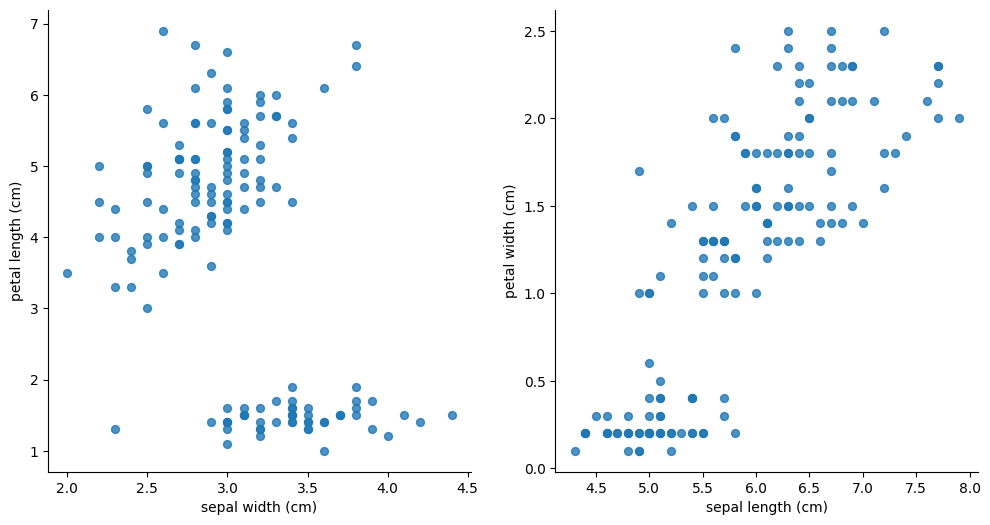

In [ ]:
# @title sepal width (cm) vs petal length (cm)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

data.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right',]].set_visible(False)

data.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title for demonstration, pick only two features from the data

X = iris.data[:, [1, 2]]  # sepal width and petal length are the features we will use
X[0:5], len(X)

(array([[3.5, 1.4],
        [3. , 1.4],
        [3.2, 1.3],
        [3.1, 1.5],
        [3.6, 1.4]]),
 150)

# Implementation

In [ ]:
import math
import numpy as np
import random

In [ ]:
# @title define a distance metric

def calc_euclidian_distance(d_1, d_2):
    return math.sqrt(((d_1[0] - d_2[0]) ** 2) + ((d_1[1] - d_2[1]) ** 2))

In [ ]:
# @title initialise cluster centres
def initialise_clusters(data, num_clusters, log=False):
  # Get max and min values of the features
  x1_min, x1_max = math.floor(data[:, 0].min()), math.ceil(data[:, 0].max())
  x2_min, x2_max =  math.floor(data[:, 1].min()), math.ceil(data[:, 1].max())

  if log:
    print(f"Range of x1: {x1_min} to {x1_max}, x2: {x2_min} to {x2_max}")

  clusters = []

  # Create new centres
  while len(clusters) < num_clusters:
    new_centre = [round(random.uniform(x1_min,  x1_max), 1),
                  round(random.uniform(x2_min,  x2_max), 1)]
    # check unique to avoid duplicates
    if new_centre not in clusters:
      clusters.append(new_centre)

  if log:
    print(f"Initial clusters: {clusters}")

  return clusters

initial_clusters = initialise_clusters(X, 3, True)

Range of x1: 2 to 5, x2: 1 to 7
Initial clusters: [[2.2, 1.7], [3.9, 3.3], [3.6, 3.1]]


In [ ]:
# @title K-means algorithm

def k_means(data, num_clusters, seed=1, log=False):
  # Set the seed
  random.seed(seed)

  clusters = initialise_clusters(data, num_clusters, log)

  # Assign each data point to a cluster. We choose cluster to 0.
  assignments = [0] * len(data)

  changed = True

  while changed:
    # Assign each point to the cluster with the nearest centre.
    for i, d in enumerate(data):
      # For each data point, compute the distance to each cluster center
      distances = [calc_euclidian_distance(d, c) for c in clusters]

      # Then assign the point to the cluster with the nearest center.
      assignments[i] = np.array(distances).argmin()

    # Recompute cluster centres.
    cluster_x_coord = [0] * len(clusters)
    cluster_y_coord = [0] * len(clusters)
    counts = [0] * len(clusters)

    # Sum up x and y coordinate values of points in each cluster.
    for d, a in zip(X, assignments):
      cluster_x_coord[a] += d[0]
      cluster_y_coord[a] += d[1]
      counts[a] += 1

    if log:
      print(f"Count of points per cluster: {counts}")

    # Compute new cluster centres
    new_centres = []
    for i, count in enumerate(counts):
      if count == 0:
        new_centres.append(initialise_clusters(data, num_clusters)[0])
      else:
        new_centres.append(
          [(cluster_x_coord[i]/count),
          (cluster_y_coord[i]/count)])

    changed = (new_centres != clusters)

    if log:
      print(f"Update clusters from {clusters} to {new_centres}")
    clusters = new_centres

  return clusters, assignments

clusters, assignments = k_means(X, 2, log=True)

Range of x1: 2 to 5, x2: 1 to 7
Initial clusters: [[2.4, 6.1], [4.3, 2.5]]
Count of points per cluster: [89, 61]
Update clusters from [[2.4, 6.1], [4.3, 2.5]] to [[2.908988764044944, 5.065168539325843], [3.2737704918032793, 1.8508196721311476]]
Count of points per cluster: [97, 53]
Update clusters from [[2.908988764044944, 5.065168539325843], [3.2737704918032793, 1.8508196721311476]] to [[2.8865979381443303, 4.958762886597939], [3.369811320754718, 1.560377358490566]]
Count of points per cluster: [99, 51]
Update clusters from [[2.8865979381443303, 4.958762886597939], [3.369811320754718, 1.560377358490566]] to [[2.8757575757575764, 4.925252525252526], [3.409803921568628, 1.4921568627450983]]
Count of points per cluster: [99, 51]
Update clusters from [[2.8757575757575764, 4.925252525252526], [3.409803921568628, 1.4921568627450983]] to [[2.8757575757575764, 4.925252525252526], [3.409803921568628, 1.4921568627450983]]


# Fit the data

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

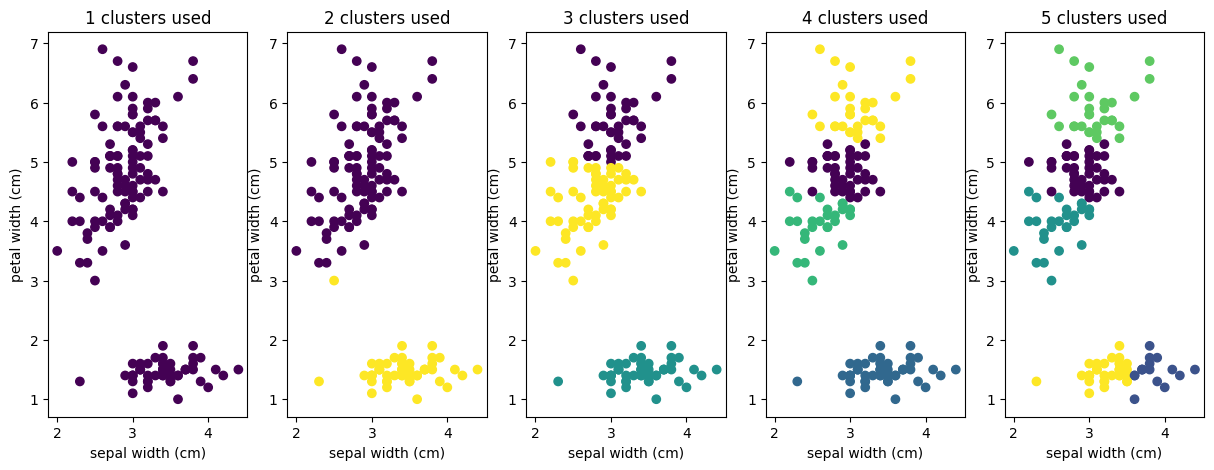

In [ ]:
# @title Explore a range of num_clusters

MAX_N = 6
plt.figure(figsize=(3*MAX_N, 5))
plt.style.use('default')

for n in range(1, MAX_N):
  plt.subplot(1, MAX_N, n)
  _, assignments = k_means(X, n)
  plt.scatter(X[:, 0], X[:, 1], c=assignments)
  plt.xlabel(iris.feature_names[1], fontsize=10)
  plt.ylabel(iris.feature_names[3], fontsize=10)
  plt.title(f'{n} clusters used')

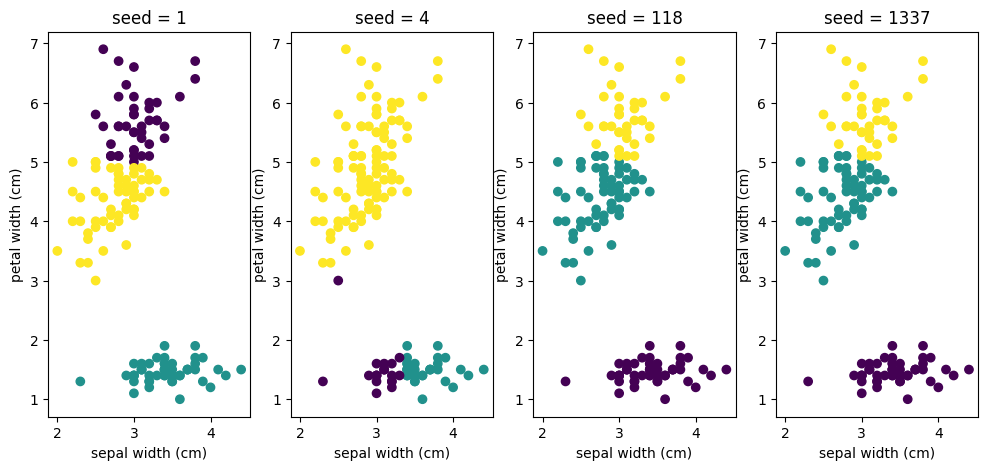

In [ ]:
# @title The initial clusters can be important!

seeds = [1, 4, 118, 1337]
plt.figure(figsize=(3*len(seeds), 5))

for i, seed in enumerate(seeds):
  plt.subplot(1, len(seeds), i+1)
  _, assignments = k_means(X, 3, seed, False)
  plt.scatter(X[:, 0], X[:, 1], c=assignments)
  plt.xlabel(iris.feature_names[1], fontsize=10)
  plt.ylabel(iris.feature_names[3], fontsize=10)
  plt.title(f'seed = {seed}')

Text(0.5, 1.0, 'k-Means Implementation')

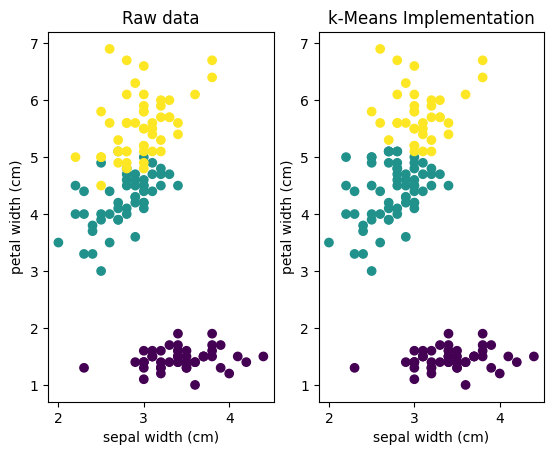

In [ ]:
# @title Compare to truth

# Plot the raw data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris.target.astype(float))
plt.xlabel(iris.feature_names[1], fontsize=10)
plt.ylabel(iris.feature_names[3], fontsize=10)
plt.title('Raw data')

# Plot the clusters we found
plt.subplot(1, 2, 2)
_, assignments = k_means(X, 3, 5, False)
plt.scatter(X[:, 0], X[:, 1], c=assignments)
plt.xlabel( iris.feature_names[1], fontsize=10)
plt.ylabel( iris.feature_names[3], fontsize=10)
plt.title('k-Means Implementation')

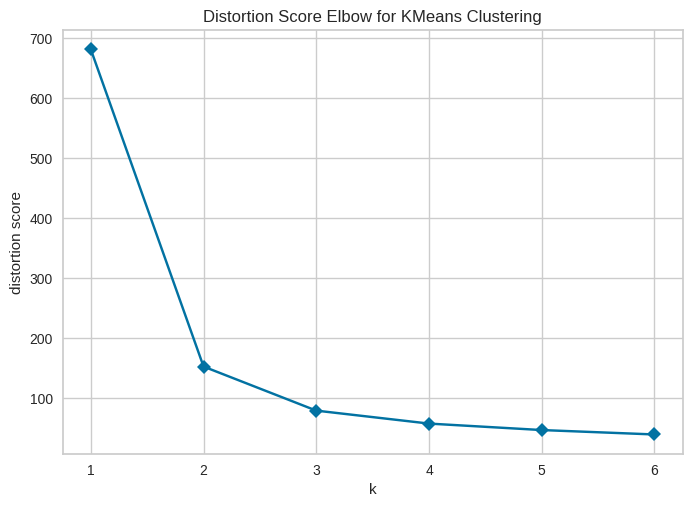

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# @title Find the optimal number of clusters

model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model,
                              k=(1,7),
                              metric='distortion',
                              locate_elbow=False,
                              timings=False)

visualizer.fit(iris.data)
visualizer.show()

In [ ]:
# @title Assess performance
"""
  Rand index. For all possible pairs of data points, we count the number that agree, that is both our classification and the ground truth either:
  - Assign both points to the same cluster , or
  - assign the points to different clusters

  RI = (number of agreeing pairs) / (number of pairs)
"""

model = KMeans(n_clusters=3, n_init=10)
model.fit(iris.data)
model_labels = model.labels_
rand_score = metrics.adjusted_rand_score(iris.target, model_labels)
print(f"Rand index for k-Means from scikit-learn: {rand_score:.4}")

Rand index for k-Means from scikit-learn: 0.7302


# Further work

Select a more advanced classifcation algorithm
https://scikit-learn.org/stable/modules/clustering.html#clustering

Apply this to the iris dataset. A good choice would be a Gaussian Mixture model that allows the clusters to have different variances and covariance.
https://scikit-learn.org/stable/modules/mixture.html#mixture